<a href="https://colab.research.google.com/github/aarya08a/Diabetes-Prediction-ML/blob/main/Diabetic_Prediction_using_different_ML_algorithms_Aarya_Teotia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration and Preprocessing:

1. Analyze the distribution of each feature.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Handle missing values (if any) appropriately.

In [4]:
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[zero_cols] = df[zero_cols].replace(0, pd.NA)

print("Missing values in the dataset:")
print(df.isna().sum())

df[zero_cols] = df[zero_cols].fillna(df[zero_cols].median())

Missing values in the dataset:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


/tmp/ipython-input-4090735223.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[zero_cols] = df[zero_cols].fillna(df[zero_cols].median())


3. Perform feature scaling if required

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Outcome' is the target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first 5 rows of the scaled training data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
display(X_train_scaled_df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.256881,-0.018995,0.034298,-0.175620,-0.007450,-0.490735,-1.035940
1,1.588046,-0.326051,0.808174,-0.560583,-0.175620,-0.599092,2.415030,1.487101
2,-0.828460,0.571536,-2.169636,-1.155463,-0.652193,-0.526941,0.549161,-0.948939
3,-1.130523,1.302903,-1.838768,0.034298,-0.175620,-1.508200,-0.639291,2.792122
4,0.681856,0.405316,0.642740,0.986106,2.604392,1.998360,-0.686829,1.139095


As mentioned before, the `NameError` in the scaling cell occurs because `X_train` and `X_test` were not defined. This is because the cell that splits the data was not executed or the runtime was reset.

To fix this, the following code cell includes the data splitting code before scaling the data. Please run the cell below.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first 5 rows of the scaled training data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
display(X_train_scaled_df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.256881,-0.018995,0.034298,-0.175620,-0.007450,-0.490735,-1.035940
1,1.588046,-0.326051,0.808174,-0.560583,-0.175620,-0.599092,2.415030,1.487101
2,-0.828460,0.571536,-2.169636,-1.155463,-0.652193,-0.526941,0.549161,-0.948939
3,-1.130523,1.302903,-1.838768,0.034298,-0.175620,-1.508200,-0.639291,2.792122
4,0.681856,0.405316,0.642740,0.986106,2.604392,1.998360,-0.686829,1.139095


Model Implementation:

1. Split the dataset into training and testing sets (e.g., 80-20 split).

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (614, 8)
Testing set size: (154, 8)


2. Build and train a Decision Tree model using a library like Scikit-learn.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [9]:
dt_model = DecisionTreeClassifier(criterion="gini",max_depth=None,random_state=42)

dt_model.fit(X_train, y_train)

print("Decision Tree Model Trained Scucessfully")

Decision Tree Model Trained Scucessfully


3. Experiment with hyperparameters such as the maximum depth, minimum samples per leaf, and splitting criteria (e.g., Gini Index, Entropy).

In [10]:
criteria = ["gini", "entropy"]
depths = [3,5,None]
min_sample = [3,5,10]

results = []

for crit in criteria:
  for depth in depths:
    for min_sam in min_sample:
      model = DecisionTreeClassifier(criterion=crit,max_depth=depth,min_samples_split=min_sam,random_state=42)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      accu = accuracy_score(y_test, y_pred)
      results.append((crit, depth, min_sam, accu))

results_df = pd.DataFrame(results, columns=["Criterion", "Max Depth", "Min Samples", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df.head(10)

,Criterion,Max Depth,Min Samples,Accuracy
0,entropy,3.0,5,0.772727
1,entropy,3.0,3,0.772727
2,entropy,3.0,10,0.772727
3,gini,3.0,3,0.759740
4,gini,3.0,5,0.759740
5,gini,3.0,10,0.759740
6,entropy,NaN,3,0.753247
7,entropy,NaN,5,0.733766
8,entropy,NaN,10,0.733766
9,gini,5.0,5,0.727273


Performance Evaluation:

1. Evaluate the model using metrics like accuracy, precision, recall.

In [11]:
y_pred = dt_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7207792207792207


In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



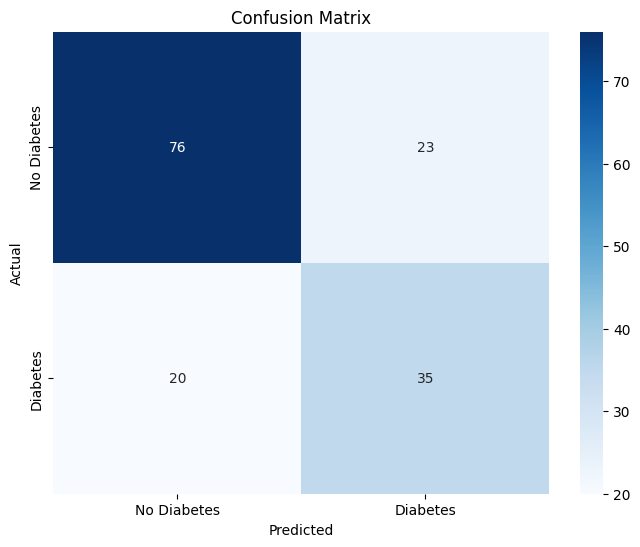

In [12]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

2. Create and visualize the Decision Tree structure using tools like Matplotlib.

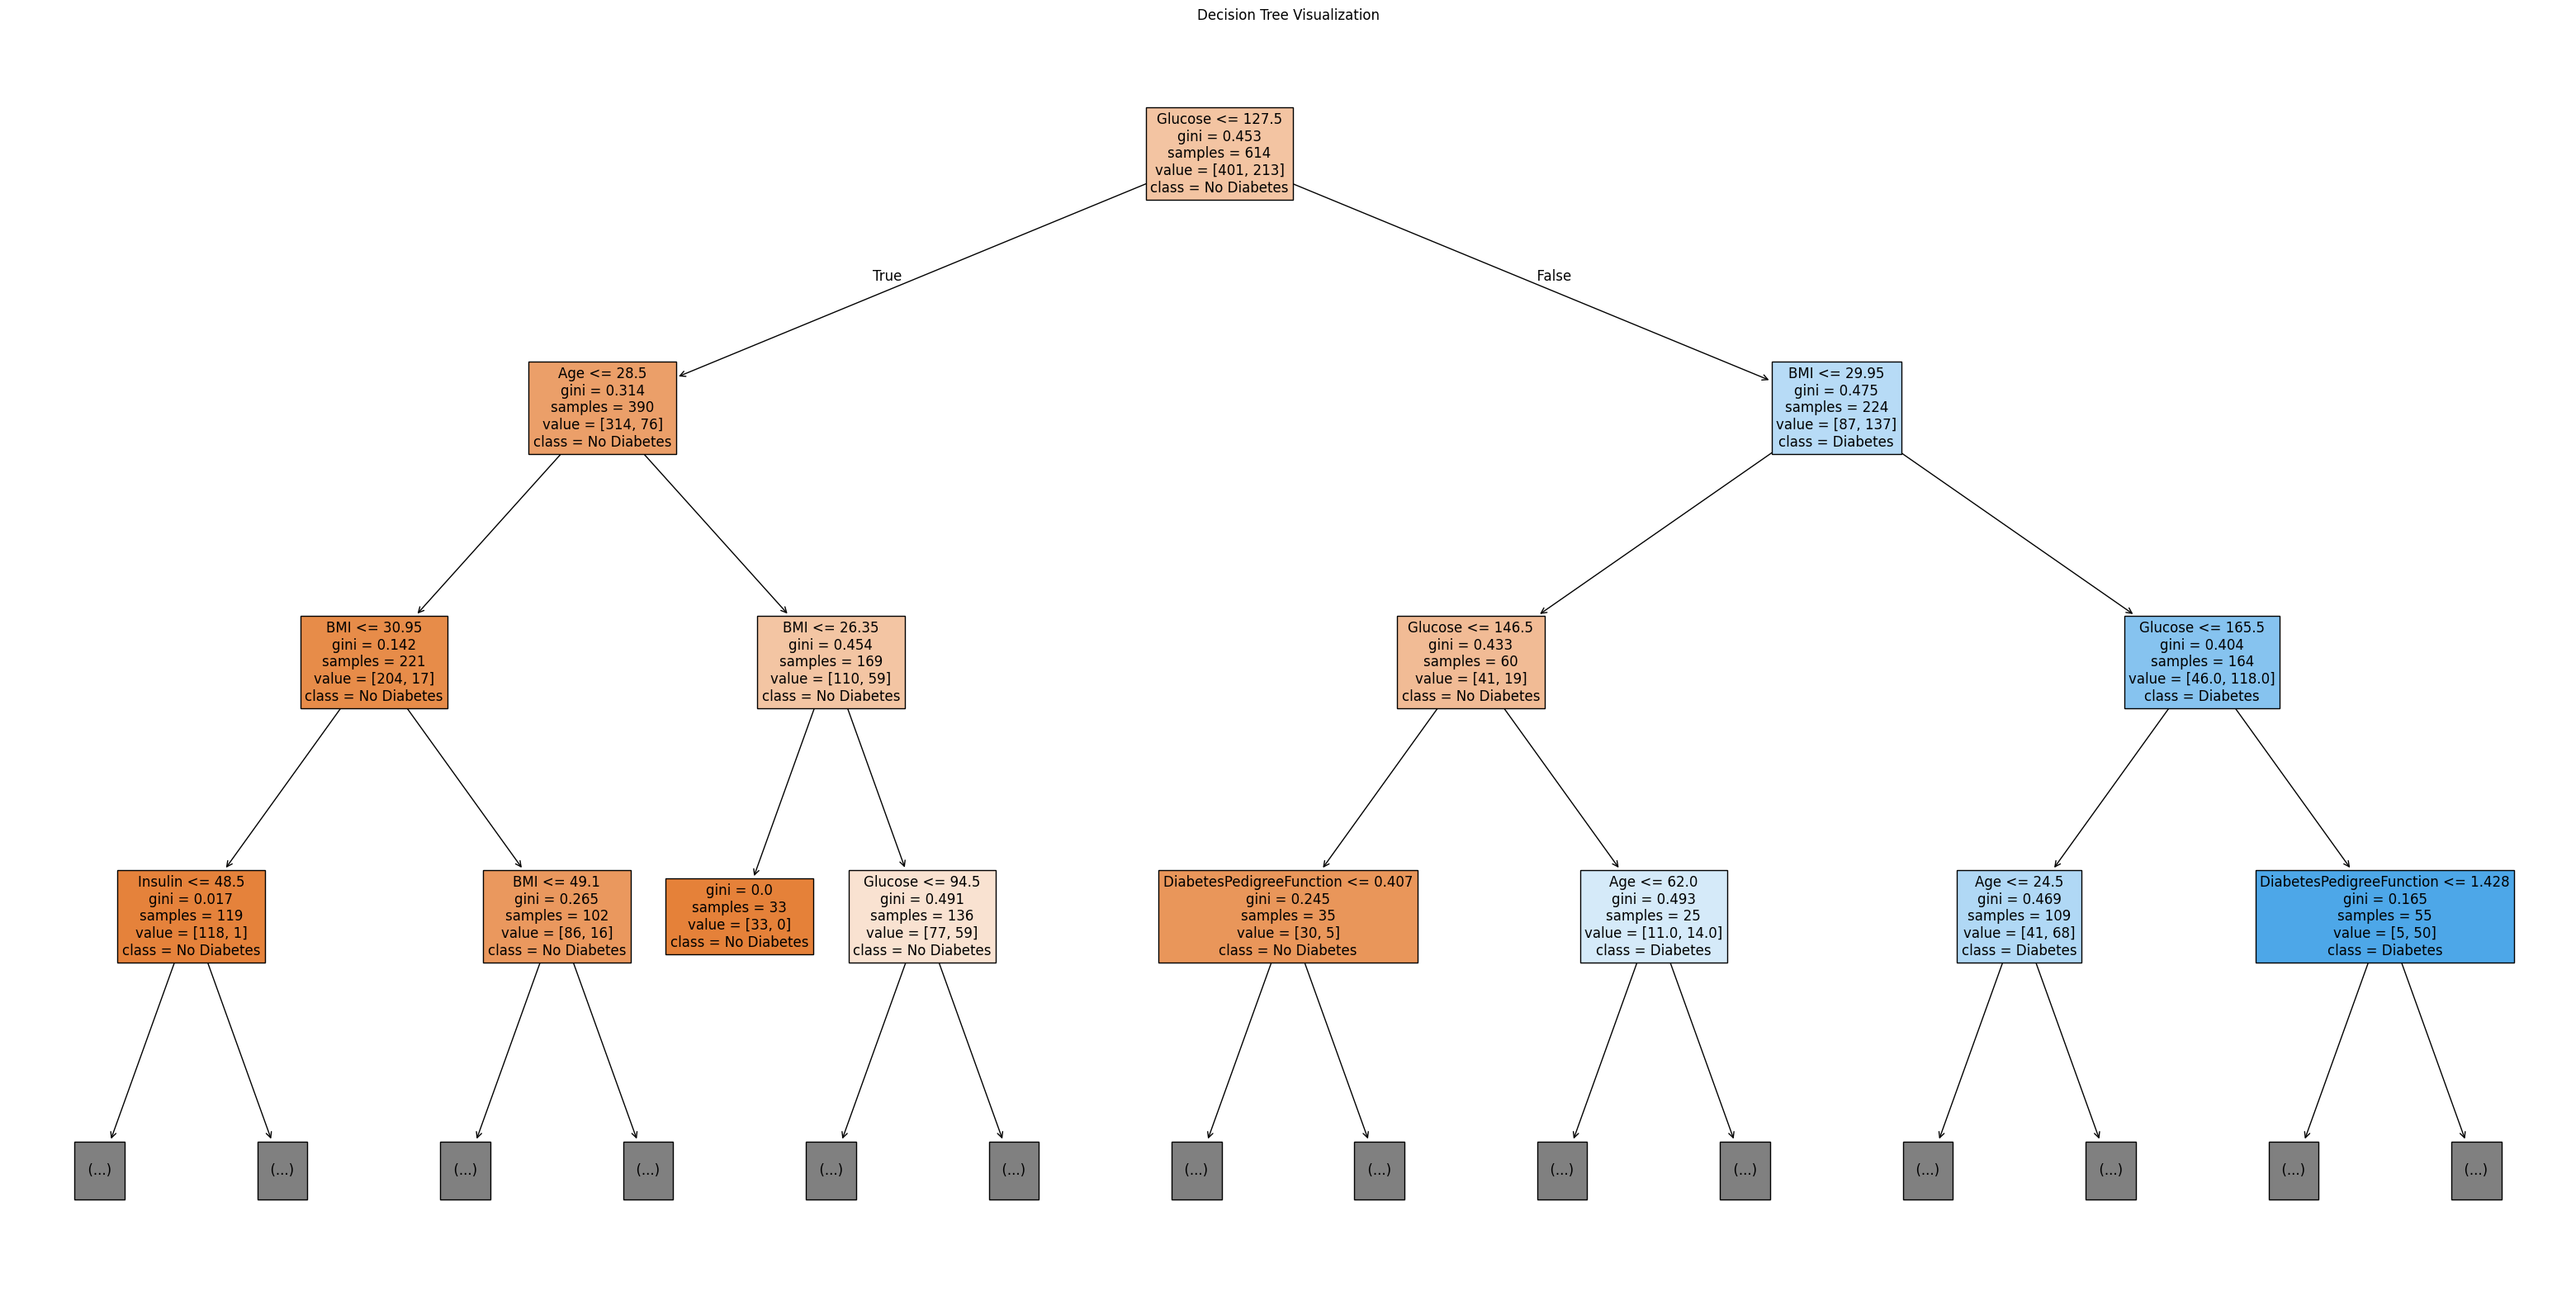

In [14]:
from sklearn import tree

plt.figure(figsize=(40, 20))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True,fontsize=12,max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

Dataset shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

=== Logistic Regression ===
Accuracy : 0.7078
Precision: 0.6000
Recall   : 0.5000
F1 score : 0.5455

Classification Report:
     

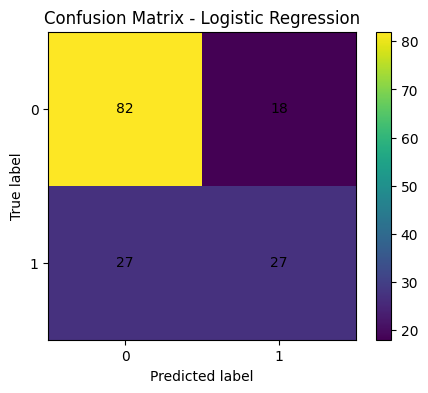

In [15]:

path = "diabetes.csv"
if not os.path.exists(path):
    raise FileNotFoundError(f"Could not find {path}. Put diabetes.csv in the same folder or update the path variable.")

df = pd.read_csv(path)
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

expected = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
missing = [c for c in expected if c not in df.columns]
if missing:
    raise ValueError(f"Missing expected columns: {missing}")


cols_with_zero_invalid = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')
df[cols_with_zero_invalid] = imputer.fit_transform(df[cols_with_zero_invalid])

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(max_iter=1000)


logreg.fit(X_train_scaled, y_train)


y_pred_log = logreg.predict(X_test_scaled)

def print_report(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"\n=== {model_name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 score : {f1:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    return acc, prec, rec, f1, cm


acc_log, prec_log, rec_log, f1_log, cm_log = print_report(y_test, y_pred_log, "Logistic Regression")

plt.figure(figsize=(5,4))
plt.imshow(cm_log, interpolation='nearest')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0,1])
plt.yticks([0,1])
for i in range(cm_log.shape[0]):
    for j in range(cm_log.shape[1]):
        plt.text(j, i, cm_log[i,j], ha='center', va='center')
plt.colorbar()
plt.show()





=== KNN (k=5) ===
Accuracy : 0.7532
Precision: 0.6600
Recall   : 0.6111
F1 score : 0.6346

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
[[83 17]
 [21 33]]


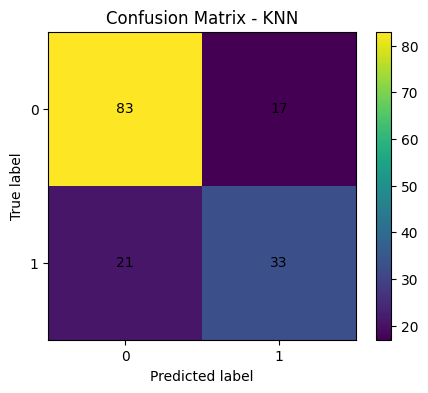

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
def print_report(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"\n=== {model_name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 score : {f1:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    return acc, prec, rec, f1, cm


acc_knn, prec_knn, rec_knn, f1_knn, cm_knn = print_report(y_test, y_pred_knn, "KNN (k=5)")
plt.figure(figsize=(5,4))
plt.imshow(cm_knn, interpolation='nearest')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0,1])
plt.yticks([0,1])
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        plt.text(j, i, cm_knn[i,j], ha='center', va='center')
plt.colorbar()
plt.show()




In [17]:
metrics_df = pd.DataFrame({
    'model': ['KNN','LogisticRegression'],
    'accuracy': [acc_knn, acc_log],
    'precision': [prec_knn, prec_log],
    'recall': [rec_knn, rec_log],
    'f1': [f1_knn, f1_log]
})
metrics_df.to_csv("diabetes_model_metrics.csv", index=False)
print("\nSaved metrics to diabetes_model_metrics.csv")


Saved metrics to diabetes_model_metrics.csv


##Among the three models, K-Nearest Neighbors (KNN) achieved the highest accuracy, indicating that it performs better in correctly classifying diabetic and non-diabetic cases compared to Decision Tree and Logistic Regression  for this dataset.